# Multi-target Regression

In [195]:
from sklearn.datasets import make_regression

x, y = make_regression(
    n_samples=500, n_features=8, n_informative=8, n_targets=3, noise=30.0
)

In [196]:
x.shape, y.shape

((500, 8), (500, 3))

In [197]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]

dfx = pd.DataFrame(
    x, columns=feature_names
)

dfx.head(5)

,Feature # 0,Feature # 1,Feature # 2,Feature # 3,Feature # 4,Feature # 5,Feature # 6,Feature # 7
0,-0.234291,3.410540,-1.055788,1.170131,-0.583787,-0.916505,0.741791,0.712511
1,1.290357,-0.893547,-0.252787,0.372504,-1.398954,0.714473,0.421053,-0.638882
2,1.010074,-2.316156,-0.786846,-1.632872,-0.130154,1.121834,-0.036761,0.122820
3,1.273611,0.146087,0.389042,0.171821,-0.227237,-0.130186,1.246264,0.409828
4,0.575768,-0.374273,-0.907563,-0.054001,-0.968092,3.412116,0.591016,0.025119


In [198]:
target_names = [f'Target # {i}' for i in range(y.shape[1])]

dfy = pd.DataFrame(
    y, columns=target_names
)

dfy.head(5)

,Target # 0,Target # 1,Target # 2
0,164.270976,76.500488,332.243261
1,-93.304859,-54.432572,-109.252772
2,-67.992018,-146.931883,-284.899534
3,82.714219,128.460132,151.325199
4,112.618186,237.370879,0.115468


In [199]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [200]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((375, 8), (375, 3), (125, 8), (125, 3))

In [201]:
from sklearn.linear_model import SGDRegressor

rgr = SGDRegressor()
rgr.fit(x_train, y_train)

y_pred = rgr.predict(x_test)

ValueError: bad input shape (375, 3)

## MultiOutput Regressor

In [213]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor

rgr = MultiOutputRegressor(
    estimator=SGDRegressor(), 
    n_jobs=-1
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [214]:
df_pred = pd.DataFrame(
    y_pred, columns=[f'Target # {i}' for i in range(y.shape[1])]
)

df_pred.head(5)

,Target # 0,Target # 1,Target # 2
0,-352.849222,-240.576353,-128.787501
1,234.181517,66.326261,7.696854
2,155.231462,45.344622,147.747449
3,-61.234729,148.834736,-34.593278
4,189.656469,249.366643,148.917926


In [215]:
df_pred.describe()

,Target # 0,Target # 1,Target # 2
count,125.000000,125.000000,125.000000
mean,9.400890,-17.411867,1.804059
std,145.367035,171.298608,128.944297
min,-352.849222,-462.809792,-462.164070
25%,-94.785308,-142.820593,-77.507723
50%,2.558329,-1.815154,10.825149
75%,105.954121,100.384961,85.864121
max,387.934670,450.340257,279.684610


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


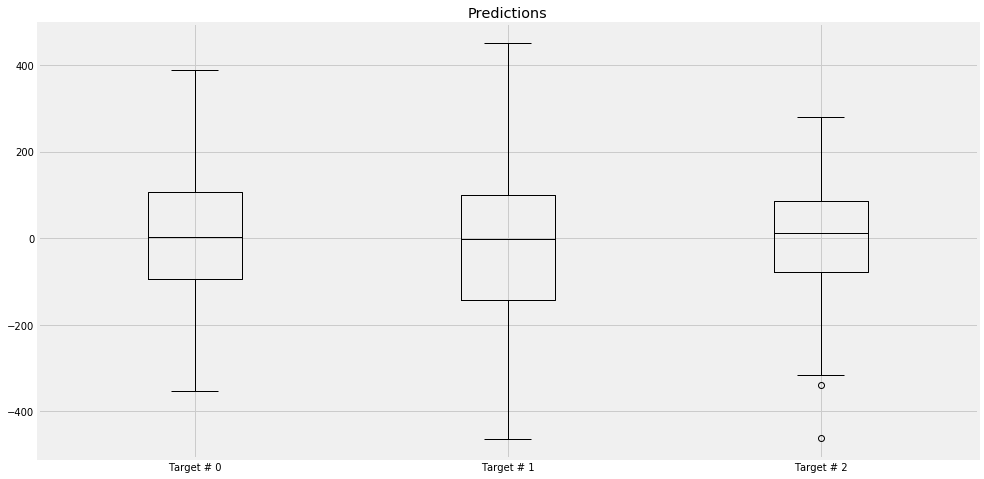

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

df_pred.plot(
    title='Predictions',
    kind='box',
    color='k',
    ax=ax
)

fig.show()

In [217]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=32.55, R2=0.846837
Target # 1: MAE=24.48, R2=0.882266
Target # 2: MAE=19.98, R2=0.903248


## Regressor Chain

In [227]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge

rgr = RegressorChain(
    base_estimator=Ridge(
        alpha=1
    ), 
    order=[0,1,2],
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [228]:
df_pred = pd.DataFrame(
    y_pred, columns=[f'Target # {i}' for i in range(y.shape[1])]
)

df_pred.head(5)

,Target # 0,Target # 1,Target # 2
0,-351.864224,-239.843365,-129.064782
1,233.260203,65.844974,7.903439
2,154.500346,45.032614,147.340666
3,-61.021133,148.466974,-34.710983
4,188.972889,248.470564,148.562350


In [229]:
df_pred.describe()

,Target # 0,Target # 1,Target # 2
count,125.000000,125.000000,125.000000
mean,9.373623,-17.300025,1.658148
std,144.923273,170.741431,128.661459
min,-351.864224,-461.219592,-461.068821
25%,-94.453103,-142.563061,-77.597279
50%,2.679298,-1.673259,10.574097
75%,105.552622,100.136042,85.742022
max,386.714170,448.988795,278.463762


In [230]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=32.54, R2=0.849077
Target # 1: MAE=24.41, R2=0.883333
Target # 2: MAE=20.25, R2=0.902682


In [232]:
for t, estimator in enumerate(rgr.estimators_):
    print(f'\nEstimator for Target # {t}:')
    df_coef = pd.DataFrame(
        zip(
            rgr.estimators_[t].coef_, 
            feature_names + target_names
        ),
        columns=['Coeff', 'Feature']
    )
    print(df_coef)


Estimator for Target # 0:
       Coeff      Feature
0  47.461634  Feature # 0
1  23.712445  Feature # 1
2   5.984506  Feature # 2
3  69.379341  Feature # 3
4  91.024753  Feature # 4
5  36.368493  Feature # 5
6  34.214164  Feature # 6
7  59.575319  Feature # 7

Estimator for Target # 1:
       Coeff      Feature
0  -2.024903  Feature # 0
1  26.673123  Feature # 1
2  66.621538  Feature # 2
3  54.186870  Feature # 3
4  21.376981  Feature # 4
5  72.187765  Feature # 5
6  25.269254  Feature # 6
7  87.975019  Feature # 7
8   0.094273   Target # 0

Estimator for Target # 2:
       Coeff      Feature
0   9.475401  Feature # 0
1  65.654326  Feature # 1
2  16.987566  Feature # 2
3  22.978893  Feature # 3
4  11.515631  Feature # 4
5  -6.380563  Feature # 5
6  61.695123  Feature # 6
7  51.703299  Feature # 7
8  -0.057848   Target # 0
9   0.165512   Target # 1


In [235]:
pd.DataFrame(
    zip(
        rgr.estimators_[0].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,47.4616
1,Feature # 1,23.7124
2,Feature # 2,5.98451
3,Feature # 3,69.3793
4,Feature # 4,91.0248
5,Feature # 5,36.3685
6,Feature # 6,34.2142
7,Feature # 7,59.5753


In [234]:
pd.DataFrame(
    zip(
        rgr.estimators_[-1].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,9.4754
1,Feature # 1,65.6543
2,Feature # 2,16.9876
3,Feature # 3,22.9789
4,Feature # 4,11.5156
5,Feature # 5,-6.38056
6,Feature # 6,61.6951
7,Feature # 7,51.7033
8,Target # 0,-0.057848
9,Target # 1,0.165512


# Multi-target Regression


**Multiclass classification:** classification task with more than two classes. Each sample can only be labelled as one class. For example, classification using features extracted from a set of images of fruit, where each image may either be of an orange, an apple, or a pear. Each image is one sample and is labelled as one of the 3 possible classes. 

**Multilabel classification:** classification task labelling each sample with x labels from n_classes. For example, prediction of the topics relevant to a text document or video. The document or video may be about one of ‘religion’, ‘politics’, ‘finance’ or ‘education’, several of the topic classes or all of the topic classes.

In [309]:
from sklearn.datasets import make_multilabel_classification

x, y = make_multilabel_classification(
    n_samples=500, n_features=8, n_classes=3, n_labels=2
)

In [310]:
x.shape, y.shape

((500, 8), (500, 3))

In [320]:
y[:,-1] = y[:,0]

In [321]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]
target_names = [f'Target # {i}' for i in range(y.shape[1])]

In [322]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [323]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

ValueError: bad input shape (375, 3)

In [324]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = MultiOutputClassifier(
    estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    n_jobs=-1
)
clf.fit(x_train, y_train)
y_pred_multioutput = clf.predict(x_test)

In [325]:
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import GradientBoostingClassifier

clf = ClassifierChain(
    base_estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    order=[0,1,2]
)
clf.fit(x_train, y_train)
y_pred_chain = clf.predict(x_test)

In [328]:
pd.DataFrame(
    zip(
        clf.estimators_[-2].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0.30486
1,Feature # 1,0.326233
2,Feature # 2,0.0415743
3,Feature # 3,0.0290591
4,Feature # 4,0.0701826
5,Feature # 5,0.0356352
6,Feature # 6,0.0349031
7,Feature # 7,0.100316
8,Target # 0,0.057236


In [329]:
pd.DataFrame(
    zip(
        clf.estimators_[-1].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0
1,Feature # 1,0
2,Feature # 2,0
3,Feature # 3,0
4,Feature # 4,0
5,Feature # 5,0
6,Feature # 6,0
7,Feature # 7,0
8,Target # 0,1
9,Target # 1,0


In [330]:
from sklearn.metrics import f1_score

print(
    'F1-Score; MultiOutputClassifier={:.2f}, ClassifierChain={:.2f}'.format(
        f1_score(y_test, y_pred_multioutput, average='macro'),
        f1_score(y_test, y_pred_chain, average='macro'),
    )
)

F1-Score; MultiOutputClassifier=0.81, ClassifierChain=0.79


## One-Vs-The-Rest

In [515]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=5000, n_features=15, n_informative=8, n_redundant=2, n_classes=4, class_sep=0.5, # 0.005,
)

In [516]:
x.shape, y.shape

((5000, 15), (5000,))

In [517]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [518]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.4336

In [519]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

clf = OneVsOneClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.4472

In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

clf = OutputCodeClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.3936

# Calibration

In [435]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000, n_features=15, n_informative=5, n_redundant=10, n_classes=2, class_sep=0.001
)

x.shape, y.shape

((50000, 15), (50000,))

In [436]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [443]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:,-1]

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


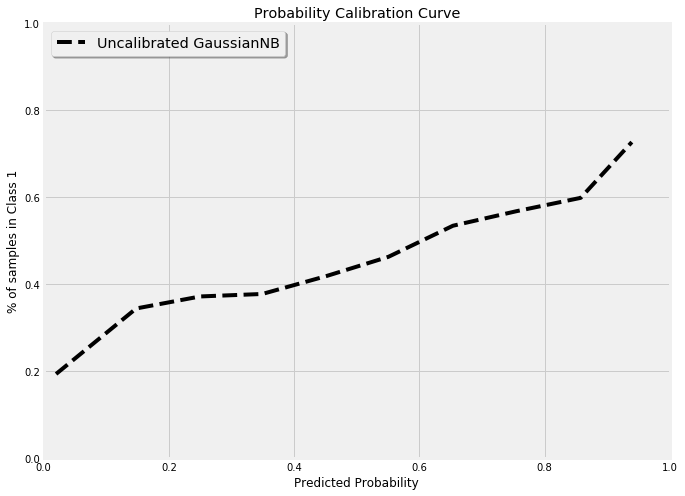

In [466]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k'
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')
ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [464]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

clf_calib = CalibratedClassifierCV(GaussianNB(), cv=3, method='isotonic')
clf_calib.fit(x_train, y_train)
y_pred_calib = clf_calib.predict(x_test)
y_pred_proba_calib = clf_calib.predict_proba(x_test)[:,-1]

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


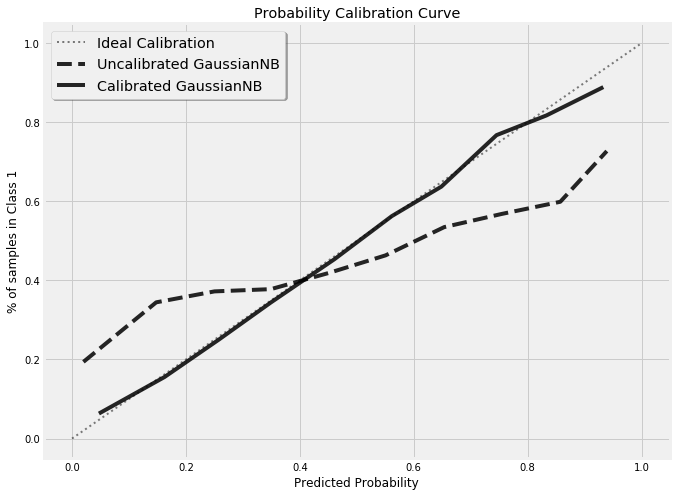

In [465]:
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k', alpha=0.85
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba_calib, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "-", label='Calibrated GaussianNB', color='k', alpha=0.85
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()